In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl  

In [91]:
%matplotlib inline

In [92]:
tdf = pd.read_csv('train.csv',header=0)

___ First step, figure out the number/ratio of survival in total. ___

In [93]:
import seaborn as sns

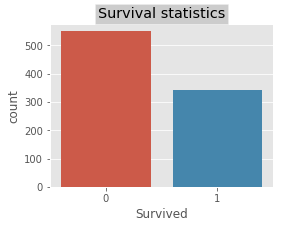

In [94]:
plt.style.use('ggplot')
total_survived_num = tdf['Survived'].sum()

plt.figure(figsize = (4,3))
sns.countplot(x='Survived',data=tdf)
plt.title('Survival statistics', bbox={'facecolor':'0.8', 'pad':3})  

plt.show()

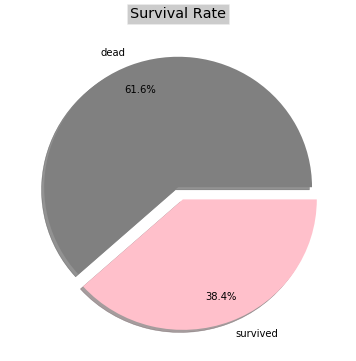

In [95]:
def draw_pie(labels,quants):   
    plt.figure(1, figsize=(6,6))   
    expl = [0,0.1]      
    colors  = ["grey","pink"]     
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)  
    plt.title('Survival Rate', bbox={'facecolor':'0.8', 'pad':3})  

labels   = ['dead', 'survived']   
quants   = [549, 342]   
draw_pie(labels,quants)  

plt.show()

In [96]:
# analyze data. #

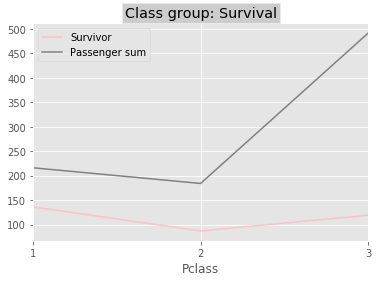

In [97]:
pddf = pd.DataFrame()
pddf['PassengerNum'] = tdf[['Pclass','Survived']].groupby(['Pclass'])['Survived'].count()
pddf['Pclass'] = pddf.index.values
pddf['Survived'] = tdf[['Pclass','Survived']].groupby(['Pclass'])['Survived'].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
pddf.Survived.plot(kind='line', color='pink', ax=ax, label = 'Survivor', xticks = pddf['Pclass'])
pddf.PassengerNum.plot(kind='line', color='grey', ax=ax, label = 'Passenger sum')
ax.legend()
plt.title('Class group: Survival', bbox={'facecolor':'0.8', 'pad':3})

plt.show()

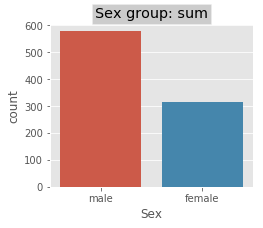

In [63]:
plt.figure(figsize=(8,3))
plt.subplot(121)
sns.countplot(x='Sex', data=tdf)
plt.title('Sex group: sum', bbox={'facecolor':'0.8', 'pad':3})

plt.show()

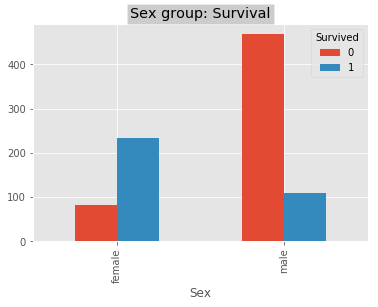

In [98]:
pd.crosstab(tdf["Sex"],tdf["Survived"]).plot(kind="bar")
plt.title('Sex group: Survival', bbox={'facecolor':'0.8', 'pad':3})

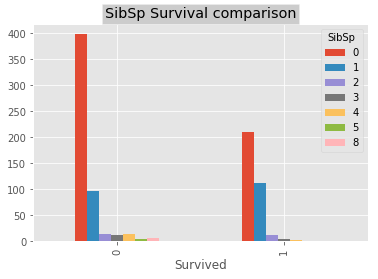

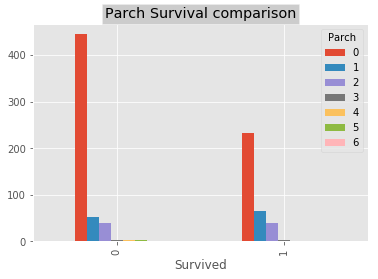

In [99]:
pd.crosstab(tdf["Survived"],tdf["SibSp"]).plot(kind="bar")
plt.title('SibSp Survival comparison', bbox={'facecolor':'0.8', 'pad':3})

pd.crosstab(tdf["Survived"],tdf["Parch"]).plot(kind="bar")
plt.title('Parch Survival comparison', bbox={'facecolor':'0.8', 'pad':3})

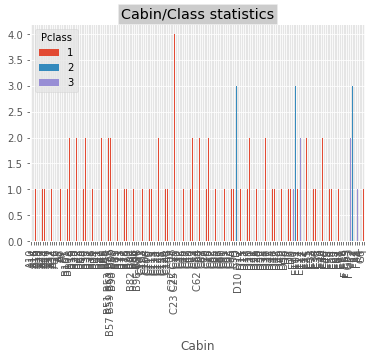

In [100]:
pd.crosstab(tdf["Cabin"],tdf["Pclass"]).plot(kind="bar")
plt.title('Cabin/Class statistics', bbox={'facecolor':'0.8', 'pad':3})

In [101]:
# through this bar chart ↑ , it's easy to find almost all Cabin information was recorded from Class 1. #
# We can guess that passengers who were in higher class would be taken more seriously. #

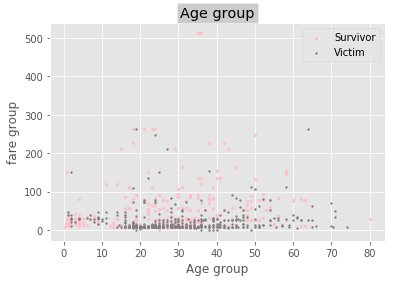

In [102]:
fig, ax = plt.subplots()

xlive = tdf.Age[tdf.Survived==1]
xdie = tdf.Age[tdf.Survived==0]
ylive = tdf.Fare[tdf.Survived==1]
ydie = tdf.Fare[tdf.Survived==0]
ax.set_xlabel('Age group')
ax.set_ylabel('fare group')
m = ax.scatter(xlive, ylive, 8, 'pink')
ax.hold
n = ax.scatter(xdie, ydie, 3, 'grey')
ax.hold
ax.legend([m,n],['Survivor','Victim'])
plt.title('Age group', bbox={'facecolor':'0.8', 'pad':3}) 

plt.show()

In [ ]:
# By the above analysis into the data, we could get some points: female, children, richer people were more likely to survive.#